Feature Engineering: En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Flor
[nltk_data]     Pedraza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
def analisis_sentimiento(review):
    """Función que analiza el sentimiento de reseñas de texto, 
        clasificándolas como positivas, neutras o negativas"""
    sia = SentimentIntensityAnalyzer() #Instanciación del analizador
    polaridad = sia.polarity_scores(review)['compound'] #Cálculo de las puntuaciones de polaridad: Este método devuelve un diccionario con las puntuaciones de sentimiento. Aquí, se accede específicamente a la puntuación compound, que es una medida del sentimiento general en un rango de -1 (muy negativo) a +1 (muy positivo)
    
    if polaridad>0:
        return 2 # Condición para el sentimiento positivo
    elif polaridad == 0:
        return 1 #Condición para el sentimiento neutral
    else:
        return 0 #Condición para el sentimiento negativo


In [4]:
ruta_archivo =  r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Originales CSV\user_reviews.parquet"
df_reviews = pd.read_parquet(ruta_archivo)


In [5]:
#Aplicamos la funcion a los elementos del df de reseñas
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(
    lambda x: analisis_sentimiento(x)
        if pd.notna(x)
        else 1) #Esto significa que si no se tiene una reseña, se lo clasifique como neutro

In [6]:
df_reviews.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2


In [7]:
df_reviews.to_csv( "user_reviews_sentiment_analysis.csv", sep=';', index=False, encoding='utf-8')
df_reviews.to_parquet('user_reviews_sentiment_analysis.parquet', index=False)

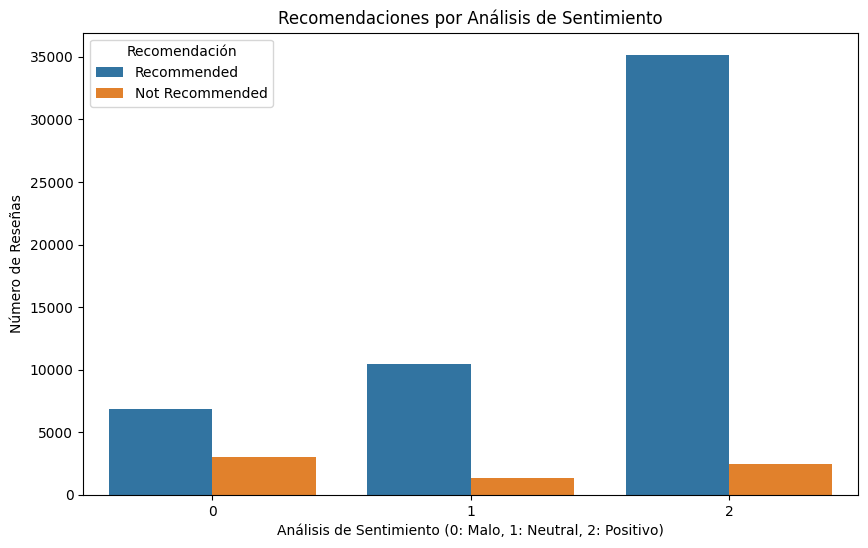

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_reviews es tu DataFrame
df_reviews['recommend'] = df_reviews['recommend'].map({True: 'Recommended', False: 'Not Recommended'})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='sentiment_analysis', hue='recommend')
plt.title('Recomendaciones por Análisis de Sentimiento')
plt.xlabel('Análisis de Sentimiento (0: Malo, 1: Neutral, 2: Positivo)')
plt.ylabel('Número de Reseñas')
plt.legend(title='Recomendación')
plt.show()


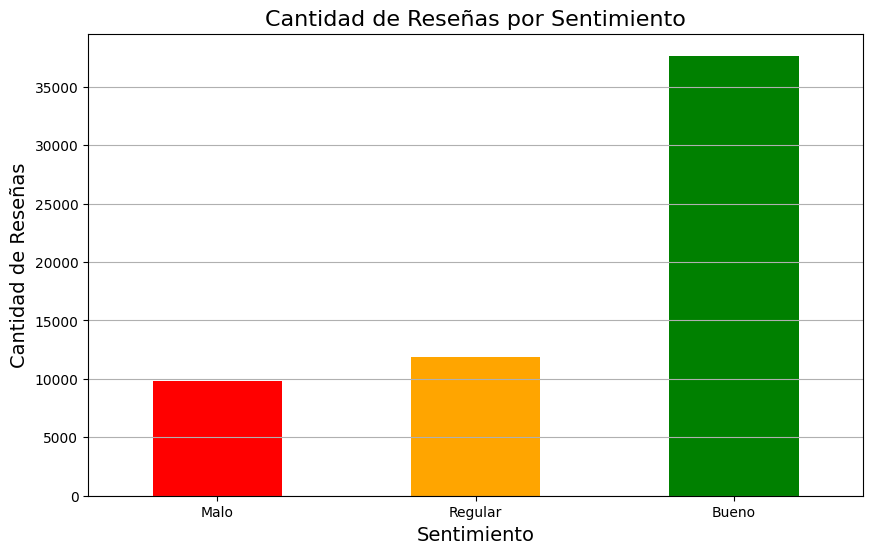

In [9]:
# Contar la cantidad de reseñas por categoría
recuento_sentimientos = df_reviews['sentiment_analysis'].value_counts().sort_index()

# Definir etiquetas para los valores
etiquetas = {0: 'Malo', 1: 'Regular', 2: 'Bueno'}
recuento_sentimientos.index = recuento_sentimientos.index.map(etiquetas)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
recuento_sentimientos.plot(kind='bar', color=['red', 'orange', 'green'])

# Añadir títulos y etiquetas
plt.title('Cantidad de Reseñas por Sentimiento', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Reseñas', fontsize=14)
plt.xticks(rotation=0)  # Mantener las etiquetas horizontales

# Mostrar la gráfica
plt.grid(axis='y')
plt.show()